### The Problem

As a data scientist of a leading decision analysis firm you are required to predict the potential global user of the game based on the data provided by the customer so that they can plan their global launch.

#### The features

1. Name - Game name
2. Platform - Running platform
3. Year of release
4. Genre - Game Genre
5. Publisher
6. Critic_score - Aggregate score compiled by Metacritic staff
7. Critic_count - The number of critics used in coming up with the Critic Score
8. User_score - Score by Metacritic’s subscribers
9. Usercount - Number of users who gave the user score
10. Developer - Party responsible for creating the game
11. Rating - The ESRB ratings
12. NA_Sales - Sales in North America (in millions of units)
13. EU_Sales - Sales in the European Union (in millions of units)
14. JP_Sales - Sales in Japan (in millions of units)
15. Global_Sales - Total sales in the world (in millions of units)

In [1]:
## Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## importing data sets

os.chdir("I:/My Machine Learning/My Python projects")
df_train = pd.read_csv('train_game.csv')
df_test = pd.read_csv('test_game.csv')
df_sample = pd.read_csv('sample_game.csv')
print("The number of rows and columns in training data", df_train.shape)
print("The number of rows and columns in test data", df_test.shape)
df_train.head(5)

The number of rows and columns in training data (14574, 15)
The number of rows and columns in test data (2143, 14)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


#### Renaming column names for the ease of coding

In [3]:


df_train = df_train.rename(columns={"Year_of_Release": "Year", 
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Global"})

df_train.head()

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


In [4]:
df_test = df_test.rename(columns={"Year_of_Release": "Year", 
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Global"})

df_test.head()

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E


## Exploratory Data Analysis

Agenda: to understand our data

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14574 entries, 0 to 14573
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          14574 non-null  object 
 1   Platform      14574 non-null  object 
 2   Year          14342 non-null  float64
 3   Genre         14574 non-null  object 
 4   Publisher     14525 non-null  object 
 5   NA            14574 non-null  float64
 6   EU            14574 non-null  float64
 7   JP            14574 non-null  float64
 8   Critic_Score  7217 non-null   float64
 9   Critic_Count  7217 non-null   float64
 10  User_Score    8760 non-null   object 
 11  User_Count    6796 non-null   float64
 12  Developer     8829 non-null   object 
 13  Rating        8704 non-null   object 
 14  Global        14574 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.7+ MB


In [6]:
## Checking for missing values

def missing_values_table(df):
        # Total missing values
        missing_values = df.isnull().sum()
        
        # Percentage of missing values
        missing_values_percentage = 100 * (df.isnull().sum() / len(df))
        
        # Make a table with the results
        missing_value_table = pd.concat([missing_values, missing_values_percentage], axis=1)
        
        # Rename the columns
        missing_values_table_rename = missing_value_table.rename(columns = {0 : "Missing Values", 1 : "% of Total Values"})
        
        # Sort the table by percentage of missing descending
        missing_values_table_rename = missing_values_table_rename[
            missing_values_table_rename.iloc[:,1] != 0].sort_values(
        "% of Total Values", ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missing_values_table_rename.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return missing_values_table_rename

In [7]:
missing_values_table(df_train)

Your selected dataframe has 15 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
User_Count,7778,53.4
Critic_Score,7357,50.5
Critic_Count,7357,50.5
Rating,5870,40.3
User_Score,5814,39.9
Developer,5745,39.4
Year,232,1.6
Publisher,49,0.3


In [8]:
missing_values_table(df_test)

Your selected dataframe has 14 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
User_Count,1349,62.9
Critic_Score,1223,57.1
Critic_Count,1223,57.1
Rating,897,41.9
User_Score,888,41.4
Developer,876,40.9
Year,37,1.7
Publisher,5,0.2


### The main issue

The main issue with computing missing values in the column `Rating`, `Developer`, `Publisher` and `Year` is that they are definite. We cannot use mode or median or any other method to fill the missing values. So the best course of action is to fill the missing values with `Unknown`.

We will drop the `Year` & `Publisher` missing rows as this is the best course of action. Also, total rows of 232 will be dropped which is just 1.9% of the data. So we won't harm the dataset

In [9]:
## Dropping the rows

df_train = df_train.dropna(subset=['Year', 'Publisher'])

In [10]:
df_train.shape

(14312, 15)

In [11]:
df_test['Publisher'] = df_test['Publisher'].fillna("No Publisher")

In [12]:
df_test.head()

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E


In [13]:
df_test.shape

(2143, 14)

#### Filling the prediction set with median because we need the same amount of rows 

In [14]:
median = df_test['Year'].median()
print(median)

2008.0


In [15]:
df_test['Year'] = df_test['Year'].fillna(median)

In [16]:
missing_values_table(df_train)

Your selected dataframe has 15 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
User_Count,7629,53.3
Critic_Score,7229,50.5
Critic_Count,7229,50.5
Rating,5762,40.3
User_Score,5702,39.8
Developer,5645,39.4


In [17]:
missing_values_table(df_test)

Your selected dataframe has 14 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
User_Count,1349,62.9
Critic_Score,1223,57.1
Critic_Count,1223,57.1
Rating,897,41.9
User_Score,888,41.4
Developer,876,40.9


Successfully dropped the rows & replaced the values in df_test

In [2]:
## Lets replace the object type columns with `No _____`

df_train['Rating'].fillna('No Rating', inplace = True)
df_train['Developer'].fillna('No Developer', inplace = True)
missing_values_table(df_train)

In [19]:
df_test['Rating'].fillna('No Rating', inplace = True)
df_test['Developer'].fillna('No Developer', inplace = True)
missing_values_table(df_test)

Your selected dataframe has 14 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
User_Count,1349,62.9
Critic_Score,1223,57.1
Critic_Count,1223,57.1
User_Score,888,41.4


We will use KNN to replace the numerical columns

In [20]:
## Removing the decimal places for year
df_train['Year'] = df_train['Year'].astype(str).apply(lambda x: x.replace('.0',''))
df_train['Year'] = df_train['Year'].astype(int)
df_train['Year'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: Year, dtype: int32

In [21]:
df_test['Year'] = df_test['Year'].astype(str).apply(lambda x: x.replace('.0',''))
df_test['Year'] = df_test['Year'].astype(int)
df_test['Year'].head()

0    2011
1    2005
2    2009
3    2008
4    2009
Name: Year, dtype: int32

# Understanding the data with visualization

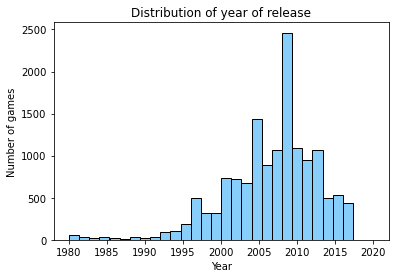

In [22]:
# Histogram plot of Year of release
# num_years = df_train['Year'].max() - df_train['Year'].min() + 1
plt.hist(df_train['Year'], bins=30, color="lightskyblue", edgecolor="black")
plt.title("Distribution of year of release")
plt.xlabel("Year")
plt.ylabel("Number of games");

#### Interpretation:

We can see an increase in number of games produced each over the years as the number of developers and producers have increased, and also with the rise of streaming

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14312 entries, 0 to 14573
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          14312 non-null  object 
 1   Platform      14312 non-null  object 
 2   Year          14312 non-null  int32  
 3   Genre         14312 non-null  object 
 4   Publisher     14312 non-null  object 
 5   NA            14312 non-null  float64
 6   EU            14312 non-null  float64
 7   JP            14312 non-null  float64
 8   Critic_Score  7083 non-null   float64
 9   Critic_Count  7083 non-null   float64
 10  User_Score    8610 non-null   object 
 11  User_Count    6683 non-null   float64
 12  Developer     14312 non-null  object 
 13  Rating        14312 non-null  object 
 14  Global        14312 non-null  float64
dtypes: float64(7), int32(1), object(7)
memory usage: 1.7+ MB


In [24]:
df_train["User_Score"] = df_train["User_Score"].replace("tbd", np.nan).astype(float)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14312 entries, 0 to 14573
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          14312 non-null  object 
 1   Platform      14312 non-null  object 
 2   Year          14312 non-null  int32  
 3   Genre         14312 non-null  object 
 4   Publisher     14312 non-null  object 
 5   NA            14312 non-null  float64
 6   EU            14312 non-null  float64
 7   JP            14312 non-null  float64
 8   Critic_Score  7083 non-null   float64
 9   Critic_Count  7083 non-null   float64
 10  User_Score    6683 non-null   float64
 11  User_Count    6683 non-null   float64
 12  Developer     14312 non-null  object 
 13  Rating        14312 non-null  object 
 14  Global        14312 non-null  float64
dtypes: float64(8), int32(1), object(6)
memory usage: 1.7+ MB


In [25]:
df_test["User_Score"] = df_test["User_Score"].replace("tbd", np.nan).astype(float)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2143 non-null   object 
 1   Platform      2143 non-null   object 
 2   Year          2143 non-null   int32  
 3   Genre         2143 non-null   object 
 4   Publisher     2143 non-null   object 
 5   NA            2143 non-null   float64
 6   EU            2143 non-null   float64
 7   JP            2143 non-null   float64
 8   Critic_Score  920 non-null    float64
 9   Critic_Count  920 non-null    float64
 10  User_Score    794 non-null    float64
 11  User_Count    794 non-null    float64
 12  Developer     2143 non-null   object 
 13  Rating        2143 non-null   object 
dtypes: float64(7), int32(1), object(6)
memory usage: 226.1+ KB


## Outlier detection

We have following numerical categories: `NA`, `EU`, `JP`, `Critic_score`, `Critic_Count`, `User_Score`, `User_Count` 

To understand their data I will plot 2 graphs:
1. Distplot: To understand the skewness
2. Boxplot: To understand the outliers, if any

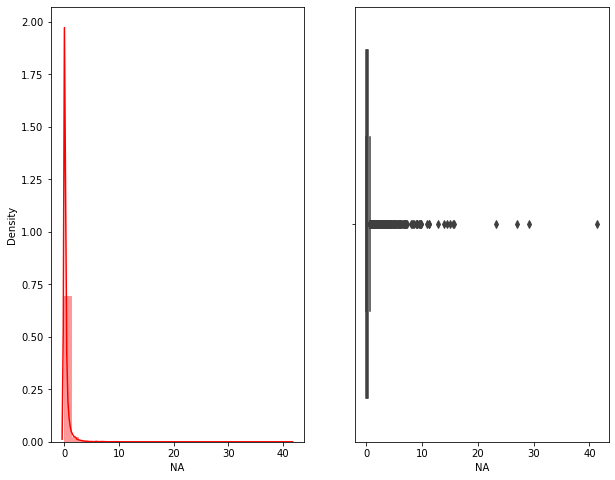

In [26]:
## Outlier detection for Sales in NA
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax1,ax2 = ax.flatten()
sns.distplot(df_train['NA'],bins=30,color='red',ax=ax1);
sns.boxplot(df_train['NA'],ax=ax2);

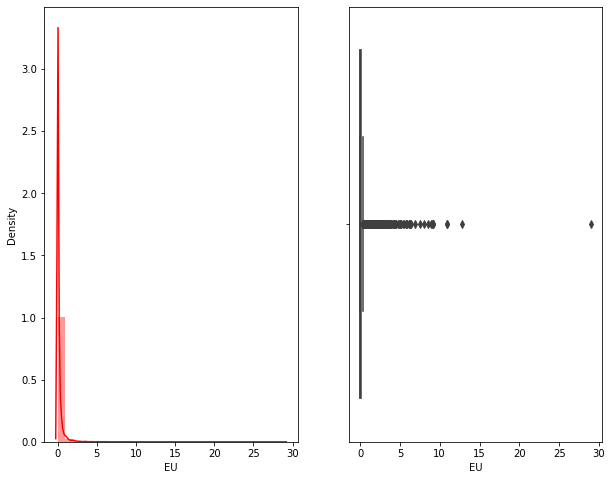

In [27]:
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax1,ax2 = ax.flatten()
sns.distplot(df_train['EU'],bins=30,color='red',ax=ax1);
sns.boxplot(df_train['EU'],ax=ax2);

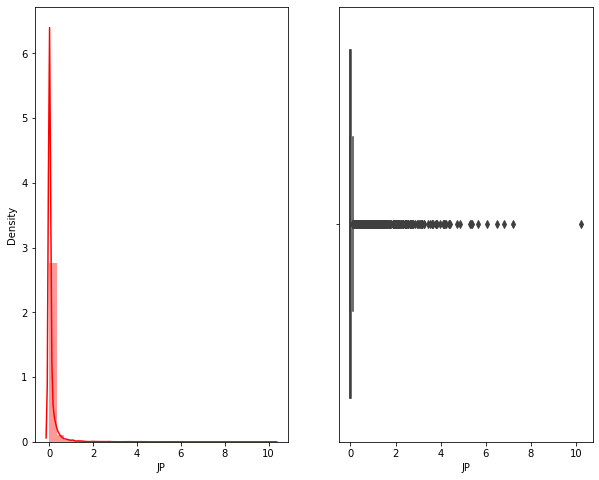

In [28]:
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax1,ax2 = ax.flatten()
sns.distplot(df_train['JP'],bins=30,color='red',ax=ax1);
sns.boxplot(df_train['JP'],ax=ax2);

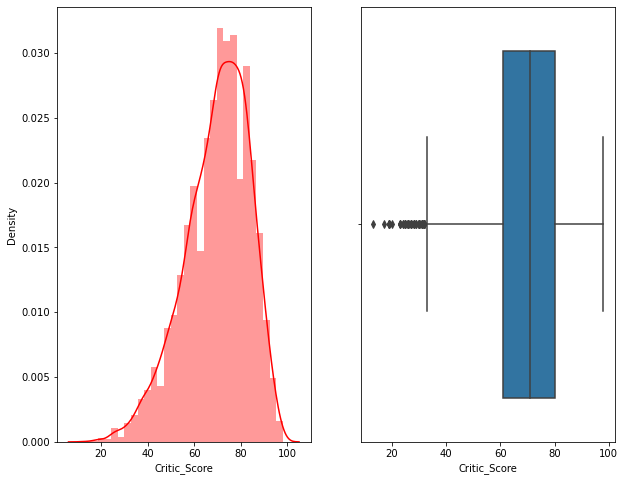

In [29]:
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax1,ax2 = ax.flatten()
sns.distplot(df_train['Critic_Score'],bins=30,color='red',ax=ax1);
sns.boxplot(df_train['Critic_Score'],ax=ax2);

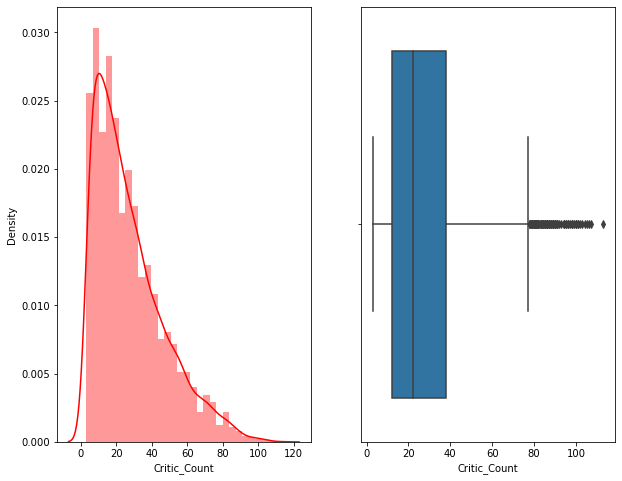

In [30]:
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax1,ax2 = ax.flatten()
sns.distplot(df_train['Critic_Count'],bins=30,color='red',ax=ax1);
sns.boxplot(df_train['Critic_Count'],ax=ax2);

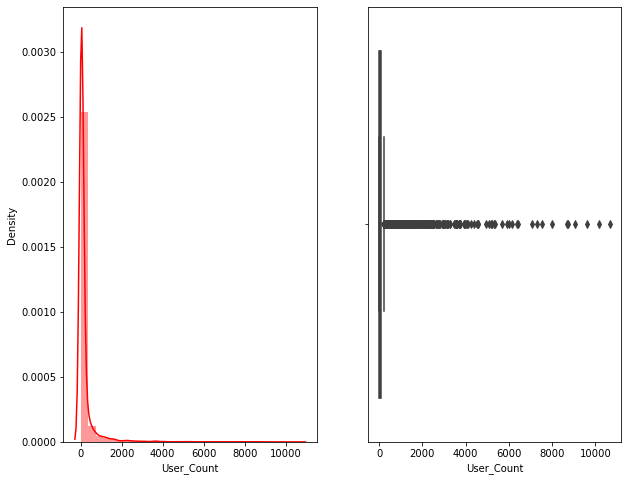

In [31]:
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax1,ax2 = ax.flatten()
sns.distplot(df_train['User_Count'],bins=30,color='red',ax=ax1);
sns.boxplot(df_train['User_Count'],ax=ax2);

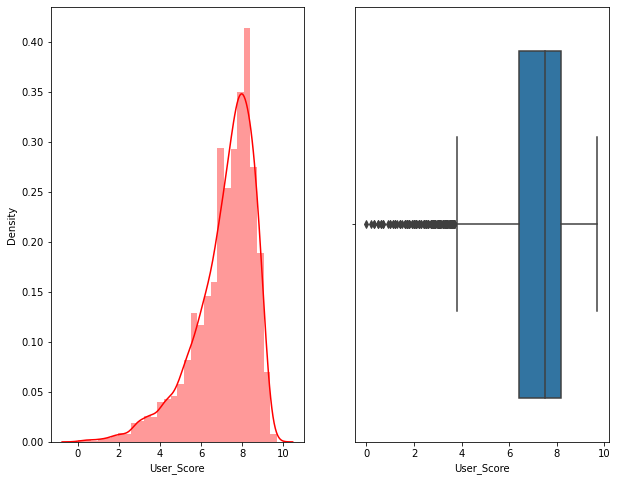

In [32]:
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax1,ax2 = ax.flatten()
sns.distplot(df_train['User_Score'],bins=30,color='red',ax=ax1);
sns.boxplot(df_train['User_Score'],ax=ax2);

#### Imputing Outliers

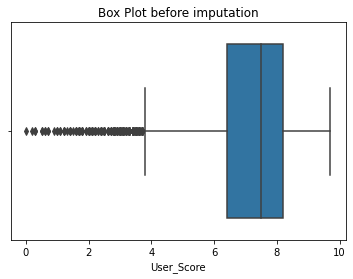

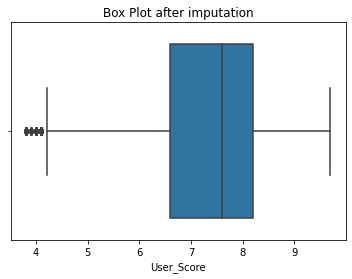

In [33]:
sns.boxplot(df_train['User_Score'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['User_Score'].quantile(0.25)
q3 = df_train['User_Score'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['User_Score'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['User_Score']:
    if i > Upper_tail:
        df_train['User_Score'] = df_train['User_Score'].replace(i, ql)
    elif i < Lower_tail:
        df_train['User_Score'] = df_train['User_Score'].replace(i, qf)
sns.boxplot(df_train['User_Score'])
plt.title("Box Plot after imputation")
plt.show()   

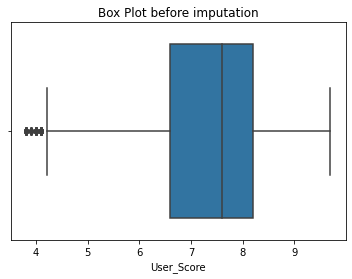

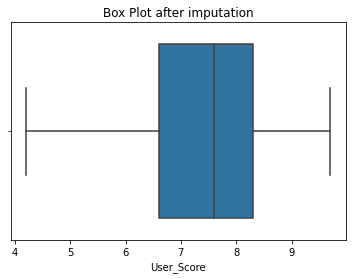

In [34]:
sns.boxplot(df_train['User_Score'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['User_Score'].quantile(0.25)
q3 = df_train['User_Score'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['User_Score'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['User_Score']:
    if i > Upper_tail:
        df_train['User_Score'] = df_train['User_Score'].replace(i, ql)
    elif i < Lower_tail:
        df_train['User_Score'] = df_train['User_Score'].replace(i, qf)
sns.boxplot(df_train['User_Score'])
plt.title("Box Plot after imputation")
plt.show()   

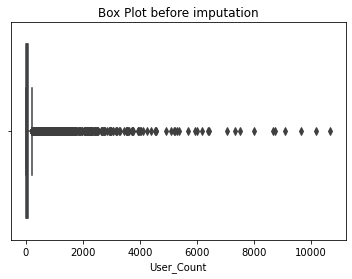

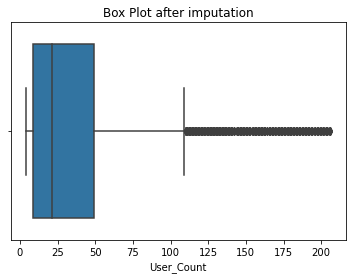

In [35]:
sns.boxplot(df_train['User_Count'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['User_Count'].quantile(0.25)
q3 = df_train['User_Count'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['User_Count'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['User_Count']:
    if i > Upper_tail:
        df_train['User_Count'] = df_train['User_Count'].replace(i, ql)
    elif i < Lower_tail:
        df_train['User_Count'] = df_train['User_Count'].replace(i, qf)
sns.boxplot(df_train['User_Count'])
plt.title("Box Plot after imputation")
plt.show()  

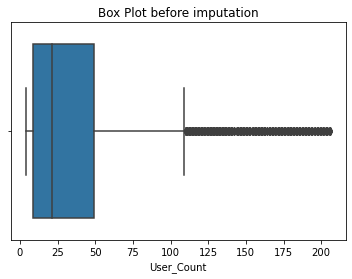

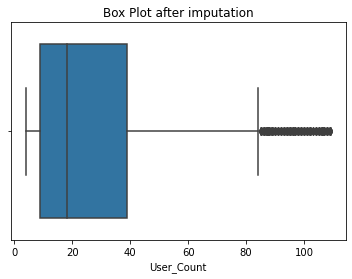

In [36]:
sns.boxplot(df_train['User_Count'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['User_Count'].quantile(0.25)
q3 = df_train['User_Count'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['User_Count'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['User_Count']:
    if i > Upper_tail:
        df_train['User_Count'] = df_train['User_Count'].replace(i, ql)
    elif i < Lower_tail:
        df_train['User_Count'] = df_train['User_Count'].replace(i, qf)
sns.boxplot(df_train['User_Count'])
plt.title("Box Plot after imputation")
plt.show()  

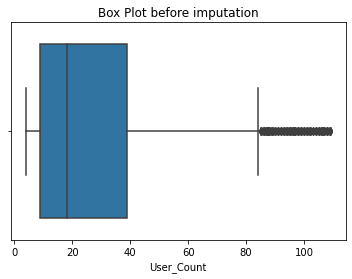

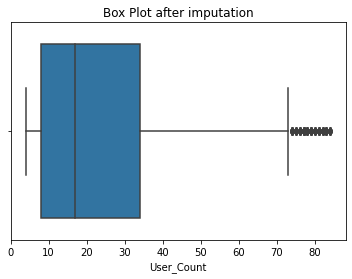

In [37]:
sns.boxplot(df_train['User_Count'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['User_Count'].quantile(0.25)
q3 = df_train['User_Count'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['User_Count'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['User_Count']:
    if i > Upper_tail:
        df_train['User_Count'] = df_train['User_Count'].replace(i, ql)
    elif i < Lower_tail:
        df_train['User_Count'] = df_train['User_Count'].replace(i, qf)
sns.boxplot(df_train['User_Count'])
plt.title("Box Plot after imputation")
plt.show()  

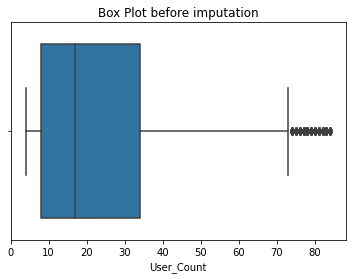

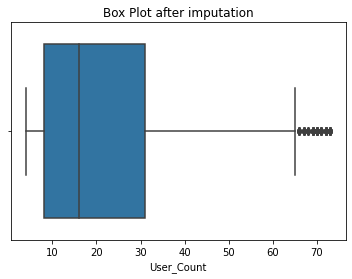

In [38]:
sns.boxplot(df_train['User_Count'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['User_Count'].quantile(0.25)
q3 = df_train['User_Count'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['User_Count'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['User_Count']:
    if i > Upper_tail:
        df_train['User_Count'] = df_train['User_Count'].replace(i, ql)
    elif i < Lower_tail:
        df_train['User_Count'] = df_train['User_Count'].replace(i, qf)
sns.boxplot(df_train['User_Count'])
plt.title("Box Plot after imputation")
plt.show()  

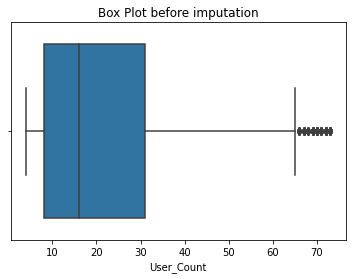

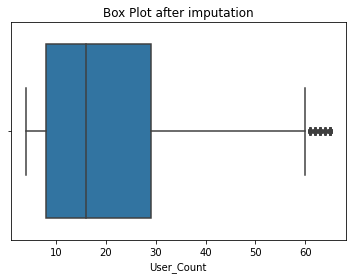

In [39]:
sns.boxplot(df_train['User_Count'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['User_Count'].quantile(0.25)
q3 = df_train['User_Count'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['User_Count'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['User_Count']:
    if i > Upper_tail:
        df_train['User_Count'] = df_train['User_Count'].replace(i, ql)
    elif i < Lower_tail:
        df_train['User_Count'] = df_train['User_Count'].replace(i, qf)
sns.boxplot(df_train['User_Count'])
plt.title("Box Plot after imputation")
plt.show()  

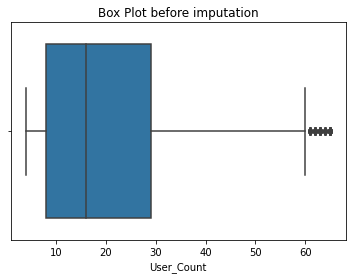

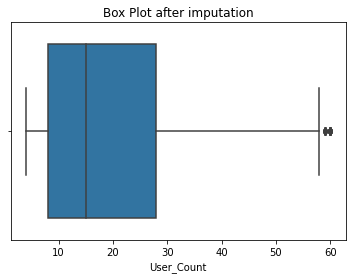

In [40]:
sns.boxplot(df_train['User_Count'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['User_Count'].quantile(0.25)
q3 = df_train['User_Count'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['User_Count'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['User_Count']:
    if i > Upper_tail:
        df_train['User_Count'] = df_train['User_Count'].replace(i, ql)
    elif i < Lower_tail:
        df_train['User_Count'] = df_train['User_Count'].replace(i, qf)
sns.boxplot(df_train['User_Count'])
plt.title("Box Plot after imputation")
plt.show()  

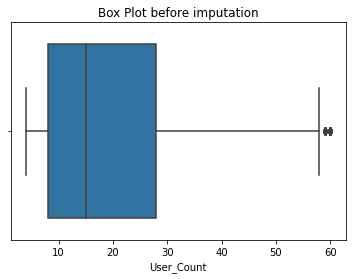

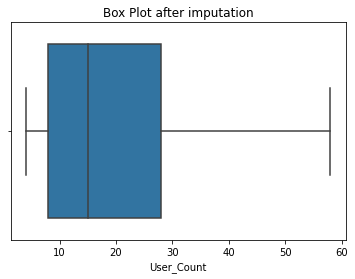

In [41]:
sns.boxplot(df_train['User_Count'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['User_Count'].quantile(0.25)
q3 = df_train['User_Count'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['User_Count'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['User_Count']:
    if i > Upper_tail:
        df_train['User_Count'] = df_train['User_Count'].replace(i, ql)
    elif i < Lower_tail:
        df_train['User_Count'] = df_train['User_Count'].replace(i, qf)
sns.boxplot(df_train['User_Count'])
plt.title("Box Plot after imputation")
plt.show()  

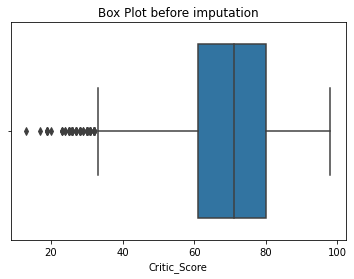

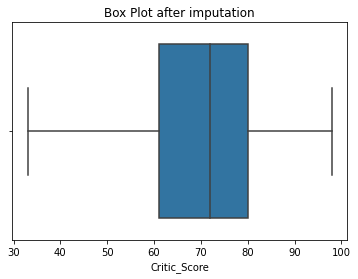

In [42]:
sns.boxplot(df_train['Critic_Score'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['Critic_Score'].quantile(0.25)
q3 = df_train['Critic_Score'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['Critic_Score'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['Critic_Score']:
    if i > Upper_tail:
        df_train['Critic_Score'] = df_train['Critic_Score'].replace(i, ql)
    elif i < Lower_tail:
        df_train['Critic_Score'] = df_train['Critic_Score'].replace(i, qf)
sns.boxplot(df_train['Critic_Score'])
plt.title("Box Plot after imputation")
plt.show()  

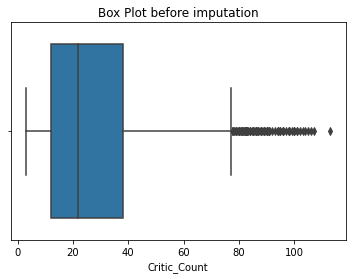

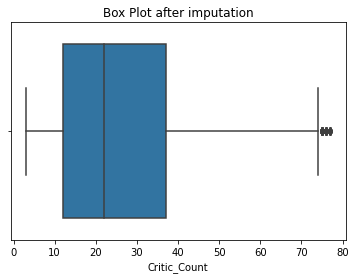

In [43]:
sns.boxplot(df_train['Critic_Count'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['Critic_Count'].quantile(0.25)
q3 = df_train['Critic_Count'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['Critic_Count'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['Critic_Count']:
    if i > Upper_tail:
        df_train['Critic_Count'] = df_train['Critic_Count'].replace(i, ql)
    elif i < Lower_tail:
        df_train['Critic_Count'] = df_train['Critic_Count'].replace(i, qf)
sns.boxplot(df_train['Critic_Count'])
plt.title("Box Plot after imputation")
plt.show()

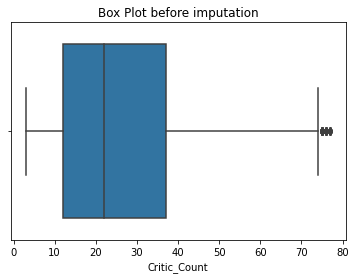

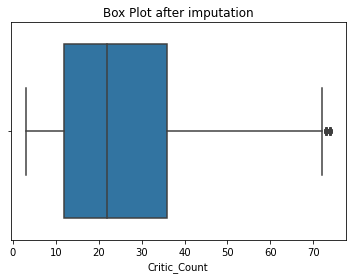

In [44]:
sns.boxplot(df_train['Critic_Count'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['Critic_Count'].quantile(0.25)
q3 = df_train['Critic_Count'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['Critic_Count'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['Critic_Count']:
    if i > Upper_tail:
        df_train['Critic_Count'] = df_train['Critic_Count'].replace(i, ql)
    elif i < Lower_tail:
        df_train['Critic_Count'] = df_train['Critic_Count'].replace(i, qf)
sns.boxplot(df_train['Critic_Count'])
plt.title("Box Plot after imputation")
plt.show()

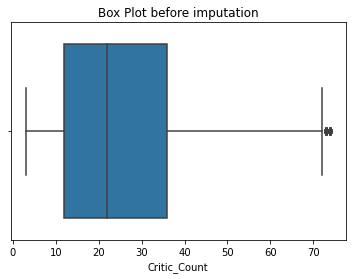

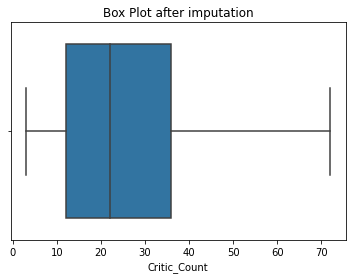

In [45]:
sns.boxplot(df_train['Critic_Count'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['Critic_Count'].quantile(0.25)
q3 = df_train['Critic_Count'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['Critic_Count'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['Critic_Count']:
    if i > Upper_tail:
        df_train['Critic_Count'] = df_train['Critic_Count'].replace(i, ql)
    elif i < Lower_tail:
        df_train['Critic_Count'] = df_train['Critic_Count'].replace(i, qf)
sns.boxplot(df_train['Critic_Count'])
plt.title("Box Plot after imputation")
plt.show()

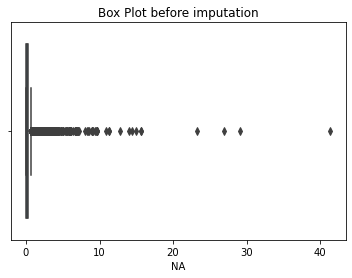

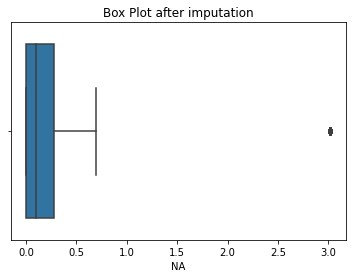

In [46]:
sns.boxplot(df_train['NA'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['NA'].quantile(0.25)
q3 = df_train['NA'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['NA'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['NA']:
    if i > Upper_tail:
        df_train['NA'] = df_train['NA'].replace(i, ql)
    elif i < Lower_tail:
        df_train['NA'] = df_train['NA'].replace(i, qf)
sns.boxplot(df_train['NA'])
plt.title("Box Plot after imputation")
plt.show()

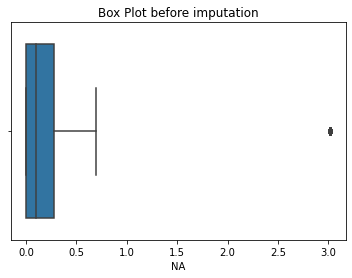

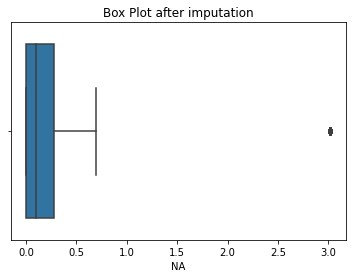

In [47]:
sns.boxplot(df_train['NA'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['NA'].quantile(0.25)
q3 = df_train['NA'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['NA'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['NA']:
    if i > Upper_tail:
        df_train['NA'] = df_train['NA'].replace(i, ql)
    elif i < Lower_tail:
        df_train['NA'] = df_train['NA'].replace(i, qf)
sns.boxplot(df_train['NA'])
plt.title("Box Plot after imputation")
plt.show()

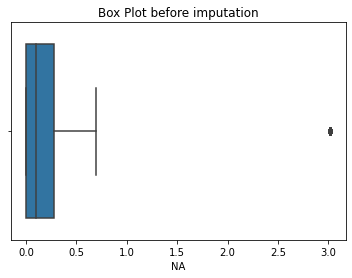

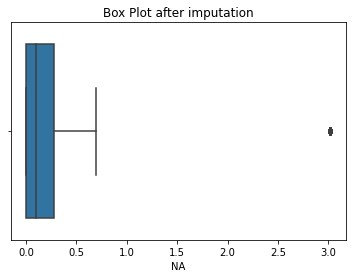

In [48]:
sns.boxplot(df_train['NA'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['NA'].quantile(0.25)
q3 = df_train['NA'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['NA'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['NA']:
    if i > Upper_tail:
        df_train['NA'] = df_train['NA'].replace(i, ql)
    elif i < Lower_tail:
        df_train['NA'] = df_train['NA'].replace(i, qf)
sns.boxplot(df_train['NA'])
plt.title("Box Plot after imputation")
plt.show()

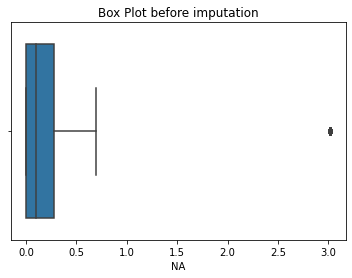

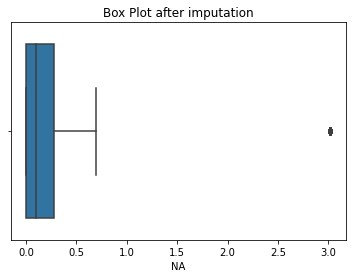

In [49]:
sns.boxplot(df_train['NA'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['NA'].quantile(0.25)
q3 = df_train['NA'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['NA'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['NA']:
    if i > Upper_tail:
        df_train['NA'] = df_train['NA'].replace(i, ql)
    elif i < Lower_tail:
        df_train['NA'] = df_train['NA'].replace(i, qf)
sns.boxplot(df_train['NA'])
plt.title("Box Plot after imputation")
plt.show()

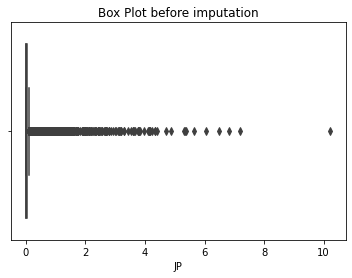

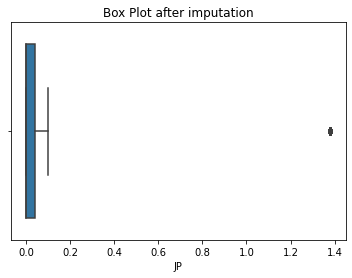

In [50]:
sns.boxplot(df_train['JP'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['JP'].quantile(0.25)
q3 = df_train['JP'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['JP'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['JP']:
    if i > Upper_tail:
        df_train['JP'] = df_train['JP'].replace(i, ql)
    elif i < Lower_tail:
        df_train['JP'] = df_train['JP'].replace(i, qf)
sns.boxplot(df_train['JP'])
plt.title("Box Plot after imputation")
plt.show()

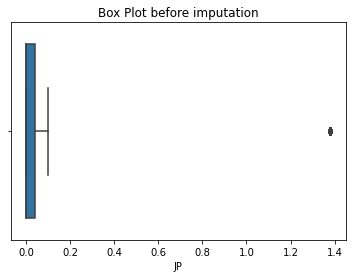

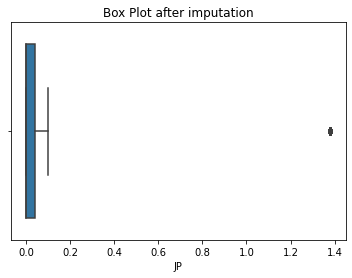

In [51]:
sns.boxplot(df_train['JP'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['JP'].quantile(0.25)
q3 = df_train['JP'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['JP'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['JP']:
    if i > Upper_tail:
        df_train['JP'] = df_train['JP'].replace(i, ql)
    elif i < Lower_tail:
        df_train['JP'] = df_train['JP'].replace(i, qf)
sns.boxplot(df_train['JP'])
plt.title("Box Plot after imputation")
plt.show()

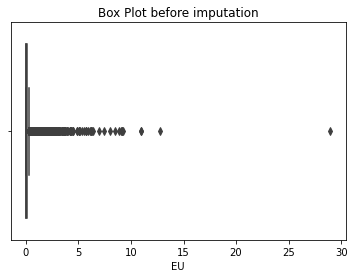

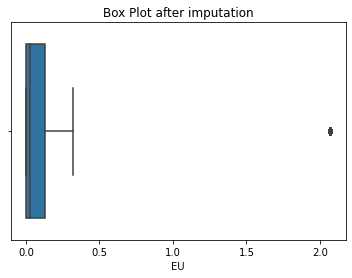

In [52]:
sns.boxplot(df_train['EU'])
plt.title("Box Plot before imputation")
plt.show()
q1 = df_train['EU'].quantile(0.25)
q3 = df_train['EU'].quantile(0.75)
iqr = q3-q1
qf, ql = np.percentile(df_train['EU'], [1,99])
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df_train['EU']:
    if i > Upper_tail:
        df_train['EU'] = df_train['EU'].replace(i, ql)
    elif i < Lower_tail:
        df_train['EU'] = df_train['EU'].replace(i, qf)
sns.boxplot(df_train['EU'])
plt.title("Box Plot after imputation")
plt.show()

In [53]:
## concating the test and training set for One Hot Encoding

df_train['Source'] = "Train"
df_test['Source'] = "Test"

In [54]:
print(df_train.columns)

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA', 'EU', 'JP',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating', 'Global', 'Source'],
      dtype='object')


In [55]:
df_train['Source'].unique

<bound method Series.unique of 0        Train
1        Train
2        Train
3        Train
4        Train
         ...  
14569    Train
14570    Train
14571    Train
14572    Train
14573    Train
Name: Source, Length: 14312, dtype: object>

In [56]:
df_full = pd.concat([df_train, df_test], axis = 0)
df_full.shape

(16455, 16)

In [57]:
print(df_full.columns)

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA', 'EU', 'JP',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating', 'Global', 'Source'],
      dtype='object')


In [58]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16455 entries, 0 to 2142
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16455 non-null  object 
 1   Platform      16455 non-null  object 
 2   Year          16455 non-null  int32  
 3   Genre         16455 non-null  object 
 4   Publisher     16455 non-null  object 
 5   NA            16455 non-null  float64
 6   EU            16455 non-null  float64
 7   JP            16455 non-null  float64
 8   Critic_Score  7930 non-null   float64
 9   Critic_Count  7755 non-null   float64
 10  User_Score    7142 non-null   float64
 11  User_Count    5319 non-null   float64
 12  Developer     16455 non-null  object 
 13  Rating        16455 non-null  object 
 14  Global        14312 non-null  float64
 15  Source        16455 non-null  object 
dtypes: float64(8), int32(1), object(7)
memory usage: 2.1+ MB


In [59]:
import category_encoders as ce

numeric_subset = df_full.select_dtypes("number")
categorical_subset = df_full[["Platform", "Genre", "Rating"]]
source = df_full["Source"]
name = df_full["Name"]
encoder = ce.ordinal.OrdinalEncoder()
categorical_subset = encoder.fit_transform(categorical_subset)
features = pd.concat([name,numeric_subset, categorical_subset, source], axis = 1)
features.shape

(16455, 14)

Went with Ordinal encoding to keep the number of columns as minimum as possible

In [60]:
features.head()

,Name,Year,NA,EU,JP,Critic_Score,Critic_Count,User_Score,User_Count,Global,Platform,Genre,Rating,Source
0,Wii Sports,2006,3.0189,2.07,1.38,76.0,51.0,8.0,NaN,82.53,1,1,1,Train
1,Super Mario Bros.,1985,3.0189,2.07,1.38,NaN,NaN,NaN,NaN,40.24,2,2,2,Train
2,Mario Kart Wii,2008,3.0189,2.07,1.38,82.0,NaN,8.3,NaN,35.52,1,3,1,Train
3,Wii Sports Resort,2009,3.0189,2.07,1.38,80.0,NaN,8.0,NaN,32.77,1,1,1,Train
4,Pokemon Red/Pokemon Blue,1996,3.0189,2.07,1.38,NaN,NaN,NaN,NaN,31.37,3,4,2,Train


In [61]:
print(features.columns)

Index(['Name', 'Year', 'NA', 'EU', 'JP', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Global', 'Platform', 'Genre', 'Rating',
       'Source'],
      dtype='object')


In [62]:
## Splitting the full df to its individual 

df_train = features[features['Source'] == "Train"].drop(['Source'], axis = 1).copy()
df_test = features[features['Source'] == "Test"].drop(['Source'], axis = 1).copy()

In [63]:
df_test.head()

,Name,Year,NA,EU,JP,Critic_Score,Critic_Count,User_Score,User_Count,Global,Platform,Genre,Rating
0,Nicktoons: MLB,2011,0.12,0.00,0.0,NaN,NaN,7.6,7.0,NaN,5,1,1
1,Shonen Jump's One Piece: Grand Battle,2005,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,7,10,2
2,Learn Math,2009,0.12,0.00,0.0,NaN,NaN,NaN,NaN,NaN,4,5,1
3,Nitrobike,2008,0.11,0.01,0.0,49.0,22.0,7.1,7.0,NaN,1,3,5
4,Cruise Ship Vacation Games,2009,0.12,0.00,0.0,NaN,NaN,NaN,NaN,NaN,1,5,1


In [64]:
df_test = df_test.drop(columns = "Global")

In [65]:
df_train.head()

,Name,Year,NA,EU,JP,Critic_Score,Critic_Count,User_Score,User_Count,Global,Platform,Genre,Rating
0,Wii Sports,2006,3.0189,2.07,1.38,76.0,51.0,8.0,NaN,82.53,1,1,1
1,Super Mario Bros.,1985,3.0189,2.07,1.38,NaN,NaN,NaN,NaN,40.24,2,2,2
2,Mario Kart Wii,2008,3.0189,2.07,1.38,82.0,NaN,8.3,NaN,35.52,1,3,1
3,Wii Sports Resort,2009,3.0189,2.07,1.38,80.0,NaN,8.0,NaN,32.77,1,1,1
4,Pokemon Red/Pokemon Blue,1996,3.0189,2.07,1.38,NaN,NaN,NaN,NaN,31.37,3,4,2


In [66]:
df_test = df_test.set_index("Name")

In [67]:
df_test.shape

(2143, 11)

In [68]:
df_train = df_train.set_index("Name")

In [69]:
df_train.head()

,Year,NA,EU,JP,Critic_Score,Critic_Count,User_Score,User_Count,Global,Platform,Genre,Rating
Name,,,,,,,,,,,,
Wii Sports,2006,3.0189,2.07,1.38,76.0,51.0,8.0,NaN,82.53,1,1,1
Super Mario Bros.,1985,3.0189,2.07,1.38,NaN,NaN,NaN,NaN,40.24,2,2,2
Mario Kart Wii,2008,3.0189,2.07,1.38,82.0,NaN,8.3,NaN,35.52,1,3,1
Wii Sports Resort,2009,3.0189,2.07,1.38,80.0,NaN,8.0,NaN,32.77,1,1,1
Pokemon Red/Pokemon Blue,1996,3.0189,2.07,1.38,NaN,NaN,NaN,NaN,31.37,3,4,2


In [70]:
## Splitting the data

X_train, X_test = train_test_split(df_train, random_state = 121)
print("Number of rows and columns in `X_train`: ", X_train.shape)
print("Number of rows and columns in `X_test` : ", X_test.shape)

Number of rows and columns in `X_train`:  (10734, 12)
Number of rows and columns in `X_test` :  (3578, 12)


In [71]:
y_test = X_test["Global"]
X_test = X_test.drop(columns = "Global")
y_train = X_train["Global"]
X_train = X_train.drop(columns = "Global")

In [72]:
print("Number of rows and columns in `X_train`: ", X_train.shape)
print("Number of rows and columns in `X_test` : ", X_test.shape)
print("Number of rows and columns in `y_train`: ", y_train.shape)
print("Number of rows and columns in `y_test` : ", y_test.shape)

Number of rows and columns in `X_train`:  (10734, 11)
Number of rows and columns in `X_test` :  (3578, 11)
Number of rows and columns in `y_train`:  (10734,)
Number of rows and columns in `y_test` :  (3578,)


In [73]:
X_train.isnull().sum()

Year               0
NA                 0
EU                 0
JP                 0
Critic_Score    5509
Critic_Count    5629
User_Score      5978
User_Count      7341
Platform           0
Genre              0
Rating             0
dtype: int64

In [74]:
## Using KKN Imputer to impute missing values

from sklearn.impute import KNNImputer
# 

knn_imp = KNNImputer(n_neighbors = 5)
X_train[['User_Count', 'User_Score', 'Critic_Count', 'Critic_Score']] = knn_imp.fit_transform(X_train[['User_Count', 'User_Score', 'Critic_Count', 'Critic_Score']])

In [75]:
X_train.isnull().sum()

Year            0
NA              0
EU              0
JP              0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Platform        0
Genre           0
Rating          0
dtype: int64

In [76]:
knn_imp = KNNImputer(n_neighbors = 5)
X_test[['User_Count', 'User_Score', 'Critic_Count', 'Critic_Score']] = knn_imp.fit_transform(X_test[['User_Count', 'User_Score', 'Critic_Count', 'Critic_Score']])
X_test.isnull().sum()

Year            0
NA              0
EU              0
JP              0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Platform        0
Genre           0
Rating          0
dtype: int64

In [77]:
knn_imp = KNNImputer(n_neighbors = 5)
df_test[['User_Count', 'User_Score', 'Critic_Count', 'Critic_Score']] = knn_imp.fit_transform(df_test[['User_Count', 'User_Score', 'Critic_Count', 'Critic_Score']])
X_test.isnull().sum()

Year            0
NA              0
EU              0
JP              0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Platform        0
Genre           0
Rating          0
dtype: int64

In [78]:
df_test.head()

,Year,NA,EU,JP,Critic_Score,Critic_Count,User_Score,User_Count,Platform,Genre,Rating
Name,,,,,,,,,,,
Nicktoons: MLB,2011,0.12,0.00,0.0,76.00000,13.400000,7.600000,7.000000,5,1,1
Shonen Jump's One Piece: Grand Battle,2005,0.07,0.05,0.0,63.41087,18.898913,6.888917,74.214106,7,10,2
Learn Math,2009,0.12,0.00,0.0,63.41087,18.898913,6.888917,74.214106,4,5,1
Nitrobike,2008,0.11,0.01,0.0,49.00000,22.000000,7.100000,7.000000,1,3,5
Cruise Ship Vacation Games,2009,0.12,0.00,0.0,63.41087,18.898913,6.888917,74.214106,1,5,1


In [79]:
X_train.head()

,Year,NA,EU,JP,Critic_Score,Critic_Count,User_Score,User_Count,Platform,Genre,Rating
Name,,,,,,,,,,,
Ride 2,2016,0.0000,0.04,0.00,71.000000,19.000000,8.000000,12.000000,10,3,1
Vehicular Combat League presents Motor Mayhem,2001,0.0800,0.06,0.00,70.098947,25.617826,7.376114,19.712644,7,3,2
Squeeballs Party,2009,0.1700,0.00,0.00,59.000000,16.000000,7.340000,26.000000,1,5,5
Yoshi's Woolly World,2015,0.6200,2.07,1.38,78.000000,28.200000,8.500000,21.600000,19,2,1
Boxing,1980,3.0189,0.04,0.00,70.098947,25.617826,7.376114,19.712644,16,10,2


In [80]:
X_test.head()

,Year,NA,EU,JP,Critic_Score,Critic_Count,User_Score,User_Count,Platform,Genre,Rating
Name,,,,,,,,,,,
Digimon Story: Cyber Sleuth,2016,0.00,0.10,0.00,75.000000,45.000000,8.500000,19.800000,10,4,4
Batman: Vengeance,2001,0.20,0.05,0.00,70.000000,17.000000,5.800000,16.000000,20,11,4
Green Day: Rock Band,2010,0.24,0.13,0.00,75.000000,54.000000,6.600000,32.000000,5,6,4
Shin Sangoku Musou 5 Empires,2010,0.00,0.00,0.05,70.206723,24.758382,7.340955,19.162544,17,9,2
Football Manager 2011,2010,0.00,2.07,0.00,85.000000,23.000000,8.400000,9.600000,15,1,1


## Feature Modeling

In [81]:
## Making baseline model

## Mean Absolute error

def mae(y_true, y_pred):
    return np.average(abs(y_true - y_pred))

In [82]:
# For the baseline guess I'll use mean value of global sales in the train dataset.
baseline_guess = np.mean(y_train)
basic_baseline_mae = mae(y_test, baseline_guess)
print("Baseline guess for global count is: {:.02f}".format(baseline_guess))
print("Baseline Performance on the test set: MAE = {:.04f}".format(basic_baseline_mae))

Baseline guess for global count is: 0.60
Baseline Performance on the test set: MAE = 0.6609


In [83]:
baseline_guess_m = np.median(y_train)
basic_baseline_mae_m = mae(y_test, baseline_guess_m)
print("Baseline guess for global count is: {:.02f}".format(baseline_guess_m))
print("Baseline Performance on the test set: MAE = {:.04f}".format(basic_baseline_mae_m))

Baseline guess for global count is: 0.22
Baseline Performance on the test set: MAE = 0.5324


In [84]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true-y_pred))) 

In [85]:
baseline_guess_rsme = np.mean(y_train)
basic_baseline_mae_rsme = rmse(y_test, baseline_guess_rsme)
print("Baseline guess for global count is: {:.02f}".format(baseline_guess_rsme))
print("Baseline Performance on the test set: RSME = {:.04f}".format(basic_baseline_mae_rsme))

Baseline guess for global count is: 0.60
Baseline Performance on the test set: RSME = 1.6403


In [86]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [87]:
## Since we have the same common step for fit, predict and evaluate, I will make a function of it

def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [88]:
# Loss function to be optimized
loss = ["ls", "lad", "huber"]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ["auto", "sqrt", "log2", None]

hyperparameter_grid = {"loss": loss,
                       "max_depth": max_depth,
                       "min_samples_leaf": min_samples_leaf,
                       "min_samples_split": min_samples_split,
                       "max_features": max_features}

In [89]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print("Linear Regression Performance on the test set: MAE = {:.04f}".format(lr_mae))

Linear Regression Performance on the test set: MAE = 0.3582


In [90]:
svm = SVR(C = 1000, gamma=0.1)
svm_mae = fit_and_evaluate(svm)

print("Support Vector Machine Regression Performance on the test set: MAE = {:.04f}".format(svm_mae))

Support Vector Machine Regression Performance on the test set: MAE = 0.5463


In [91]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print("Random Forest Regression Performance on the test set: MAE = {:.04f}".format(random_forest_mae))

Random Forest Regression Performance on the test set: MAE = 0.2210


In [92]:
gradient_boosting = GradientBoostingRegressor(random_state=60)
gradient_boosting_mae = fit_and_evaluate(gradient_boosting)

print("Gradient Boosting Regression Performance on the test set: MAE = {:.04f}".format(gradient_boosting_mae))

Gradient Boosting Regression Performance on the test set: MAE = 0.2328


In [93]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print("K-Nearest Neighbors Regression Performance on the test set: MAE = {:.04f}".format(knn_mae))

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.4126


In [94]:
knn_20 = KNeighborsRegressor(n_neighbors=20)
knn_mae_20 = fit_and_evaluate(knn_20)

print("K-Nearest Neighbors Regression Performance on the test set: MAE = {:.04f}".format(knn_mae))

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.4126


In [95]:
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_mae_5 = fit_and_evaluate(knn_5)

print("K-Nearest Neighbors Regression Performance on the test set: MAE = {:.04f}".format(knn_mae))

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.4126


In [96]:
ridge = Ridge(alpha=10)
ridge_mae = fit_and_evaluate(ridge)

print("Ridge Regression Performance on the test set: MAE = {:.04f}".format(ridge_mae))

Ridge Regression Performance on the test set: MAE = 0.3577


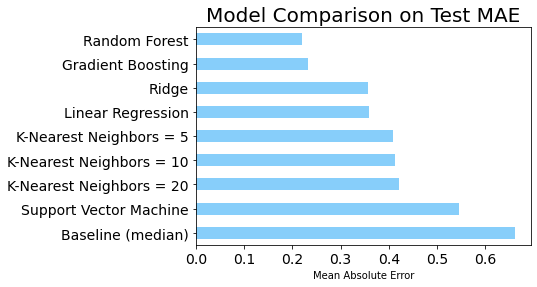

In [97]:
model_comparison = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors = 10", "K-Nearest Neighbors = 5", "K-Nearest Neighbors = 20", "Baseline (median)", "Ridge"],
                                 "mae": [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosting_mae, knn_mae, knn_mae_5, knn_mae_20, basic_baseline_mae, ridge_mae]})
model_comparison.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="barh",
                                                           color="lightskyblue", legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);

In [98]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [99]:
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestRegressor(random_state = 53)

random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=random_grid,
                               cv=4, n_iter=20, 
                               n_jobs=-1, verbose=1,
                               random_state=42)
random_cv.fit(X_train, y_train);

Fitting 4 folds for each of 20 candidates, totalling 80 fits


In [100]:
random_cv.best_params_

{'n_estimators': 188,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [101]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.2234 degrees.
Accuracy = 80.76%.


In [102]:
best_random = random_cv.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.2068 degrees.
Accuracy = 67.02%.


In [103]:
df_test.shape

(2143, 11)

In [104]:
pred_df = best_random.predict(df_test)

In [105]:
pred_df = pd.DataFrame(pred_df)

In [106]:
pred_df.shape

(2143, 1)

In [107]:
df_test.head()

,Year,NA,EU,JP,Critic_Score,Critic_Count,User_Score,User_Count,Platform,Genre,Rating
Name,,,,,,,,,,,
Nicktoons: MLB,2011,0.12,0.00,0.0,76.00000,13.400000,7.600000,7.000000,5,1,1
Shonen Jump's One Piece: Grand Battle,2005,0.07,0.05,0.0,63.41087,18.898913,6.888917,74.214106,7,10,2
Learn Math,2009,0.12,0.00,0.0,63.41087,18.898913,6.888917,74.214106,4,5,1
Nitrobike,2008,0.11,0.01,0.0,49.00000,22.000000,7.100000,7.000000,1,3,5
Cruise Ship Vacation Games,2009,0.12,0.00,0.0,63.41087,18.898913,6.888917,74.214106,1,5,1


In [108]:
df_test = df_test.reset_index()

In [109]:
df_test.head()

,Name,Year,NA,EU,JP,Critic_Score,Critic_Count,User_Score,User_Count,Platform,Genre,Rating
0,Nicktoons: MLB,2011,0.12,0.00,0.0,76.00000,13.400000,7.600000,7.000000,5,1,1
1,Shonen Jump's One Piece: Grand Battle,2005,0.07,0.05,0.0,63.41087,18.898913,6.888917,74.214106,7,10,2
2,Learn Math,2009,0.12,0.00,0.0,63.41087,18.898913,6.888917,74.214106,4,5,1
3,Nitrobike,2008,0.11,0.01,0.0,49.00000,22.000000,7.100000,7.000000,1,3,5
4,Cruise Ship Vacation Games,2009,0.12,0.00,0.0,63.41087,18.898913,6.888917,74.214106,1,5,1


In [113]:
output_df = pd.DataFrame()
output_df['Name'] = df_sample["Name"]
output_df['Global Sales'] = pred_df

In [114]:
output_df.to_csv("Prediction_1.csv", index = False)